In [19]:
import os
import array


import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.time import Time
from scipy import signal
from numpy.random import random_sample

+ Еще раз проверить восстановление периода в незашумленных данных
+ Записать результаты 

0.8038585209003215


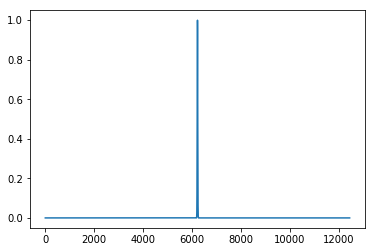

In [144]:
period_s = 1.244 # желаемая точность - до 5 знака
pulse = signal.gaussian(period_s*10e3, std=10, sym=True)
#window = np.array([random_sample(1)*random_sample(1)*i for i in window])
plt.plot(pulse)
print(1/period_s)

In [172]:
obser = []
for i in range(10):
    obser.append([])
    for j in range(1000):
        obser[i].extend(random_sample(1)*pulse + np.random.normal(0, 0.01, len(pulse)))

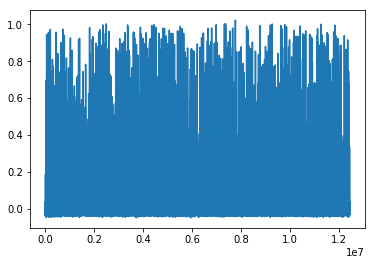

In [173]:
plt.close()
plt.plot(obser[1])
plt.show()

In [174]:
# Звездные сутки 86164,090530833 с

In [175]:
noised_obser = obser[1]
obs_points = len(noised_obser)
x = bin(obs_points)
x_high = '0b1' + '0'*(len(x[2:]))
add_points = int(x_high, 2) - obs_points
print(add_points, obs_points + add_points)
obs_points += add_points
noised_obser = np.append(noised_obser, np.zeros(add_points))

4337216 16777216


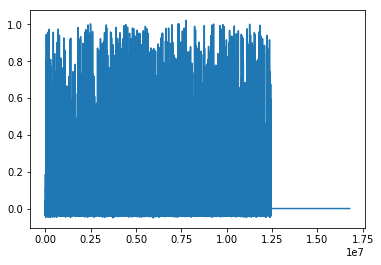

In [176]:
plt.close()
plt.plot(noised_obser)
plt.show()

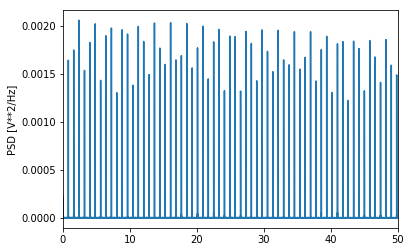

In [177]:
fs = 10e3 # частотота дискретизации временных рядов 
f, Pxx_den = signal.periodogram(noised_obser, fs)
plt.plot(f, Pxx_den)
plt.ylabel('PSD [V**2/Hz]')
# plt.axhline(0.3*max(Pxx_den))
# plt.ylim(0, 0.00003)
plt.xlim(0, 50)
plt.show()

In [178]:
peaks, _ = signal.find_peaks(Pxx_den, height=0.5*max(Pxx_den))
main_harm = f[peaks][0]
for i in f[peaks][0:10]:
    print(i, i/main_harm)

0.8040666580200195 1.0
1.6075372695922852 1.999258710155671
2.4116039276123047 2.999258710155671
3.215670585632324 3.999258710155671
4.01914119720459 4.998517420311342
4.823207855224609 5.998517420311342
5.627274513244629 6.998517420311342
6.4307451248168945 7.997776130467012
7.234811782836914 8.997776130467013
8.038878440856934 9.997776130467013


In [179]:
print(abs(main_harm - 1/period_s))

0.0002081371196980264


In [142]:
print(2/period_s)

1.607717041800643
